<a href="https://colab.research.google.com/github/Chanda9/DR_Detection/blob/main/Retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Import important libraries
from PIL import Image
from keras.preprocessing import image
import os
import numpy as np
import pandas as pd
from subprocess import check_output

In [ ]:
#viewing all the images along with their csv in the DATA folder
print(check_output(["ls", "/content/gdrive/My Drive/FYP_2/DATA"]).decode("utf8"))

0024cdab0c1e.jpg
00cb6555d108.jpg
0124dffecf29.jpg
01b3aed3ed4c.jpg
04ac765f91a1.jpg
05a5183c92d0.jpg
0684311afdfc.jpg
07929d32b5b3.jpg
086d41d17da8.jpg
09935d72892b.jpg
0a61bddab956.jpg
0dce95217626.jpg
101b9ebfc720.jpg
107aea0d9289.jpg
10f36b0239fb.jpg
1116271db4ea.jpg
12ce6a1a1f31.jpg
15cc2aef772a.jpg
17eff993386f.jpg
18b06f56ab27.jpg
1908030187_20190826134806965.jpg
1908030187_20190826134807277.jpg
1908030187_20190826134807573.jpg
1908030187_20190826134808244.jpg
194814669fee.jpg
19722bff5a09.jpg
19e350c7c83c.jpg
1a03a7970337.jpg
1c0cf251b426.jpg
1c3a6b4449e9.jpg
1df3e03a8f5f.jpg
1e8a1fdee5b9.jpg
200d947f75db.jpg
22098b1fe461.jpg
22325552a4e3.jpg
22a6da005395.jpg
24b943fe725e.jpg
259d30f693b6.jpg
25e9fd872182.jpg
274f5029189b.jpg
278aa860dffd.jpg
27e4c800a449.jpg
2994f17f58a5.jpg
2a08ed6bbcbc.jpg
2d9d97a6e713.jpg
2f2e1949ad56.jpg
2f4e81787d9b.jpg
3044022c6969.jpg
30941b65348b.jpg
30cab14951ac.jpg
31cb39681f6a.jpg
35aa7f5c2ec0.jpg
36041171f441.jpg
365f8c01d994.jpg
36677b70b1ef.jpg
3

In [ ]:
#converting csv into dataframe named trainlabels
trainLabels = pd.read_csv("/content/gdrive/My Drive/FYP_2/DATA/DATA.csv")
trainLabels.head()

,Image,Level
0,814547_20180910124454197,0
1,814547_20180910124454493,0
2,ABBAS HAIDER_20180627103525163,0
3,ABBAS HAIDER_20180627103525506,0
4,ABBAS HAIDER_20180828102353405,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


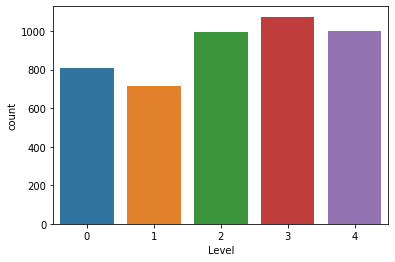

In [ ]:
#visualizing data distribution
import seaborn as sns
sns.countplot("Level",data= trainLabels)

In [ ]:
print(trainLabels['Level'].value_counts())

3    1074
4     999
2     997
0     808
1     714
Name: Level, dtype: int64


In [ ]:
#total number of images
listing = os.listdir("/content/gdrive/My Drive/FYP_2/DATA") 
listing.remove("DATA.csv")
np.size(listing)

4592

In [ ]:
#this part is about the preprocessing of images and creating two lists, one for the images and other one for the corresponding labels.
img_rows, img_cols = 200, 200

immatrix = []
imlabel = []

for file in listing:
    base = os.path.basename("/content/gdrive/My Drive/FYP_2/DATA/" + file)
    fileName = os.path.splitext(base)[0]
    imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'Level'].values[0])
    im = Image.open("/content/gdrive/My Drive/Final year project/images2/" + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
    immatrix.append(np.array(gray).flatten()) 

The above task of preprocessing takes time. For the sake of quick experimentation I have savaed the two lists into .npy files in the directory and now I just need to load them whenever I need to use them. This saves alot of time.

In [ ]:
immatrix=np.load("/content/gdrive/My Drive/FYP_2/immatrixxx.npy").tolist()

In [ ]:
imlabel=np.load("/content/gdrive/My Drive/FYP_2/imlabelllll.npy").tolist()

In [ ]:
immatrix = np.asarray(immatrix)
imlabel = np.asarray(imlabel)

In [ ]:
from sklearn.utils import shuffle

dataa,Label = shuffle(immatrix,imlabel, random_state=2)
train_data = [dataa,Label]
type(train_data)

list

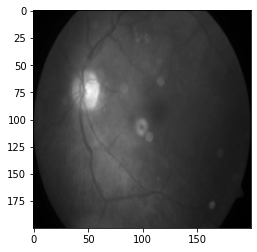

In [ ]:
#visualizing one of the input images
import matplotlib.pyplot as plt
import matplotlib
img_rows, img_cols = 200, 200
img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')

In [ ]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 400
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3
(X, y) = (train_data[0],train_data[1])

In [ ]:
from sklearn.model_selection import train_test_split
# STEP 1: split X and y into training and testing sets
img_rows, img_cols = 200, 200
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)

#X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
#img_rows, img_cols = 200, 200
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(3673, 40000)
(919, 40000)
X_train shape: (3673, 200, 200, 1)
3673 train samples
919 test samples


label :  [0. 0. 1. 0. 0.]


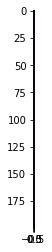

In [ ]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 2011
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

In [ ]:
#creating DNN
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,Adam

model = Sequential()
    # first set of CONV => RELU => MAX POOL layers
model.add(Convolution2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_cols, img_rows, 1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
# returns our fully constructed deep learning + Keras image classifier 
INIT_LR = 1e-3
opt = Adam(lr=INIT_LR, decay=INIT_LR / nb_epoch)
# use binary_crossentropy if there are two classes
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 198, 198, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 99, 99, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0

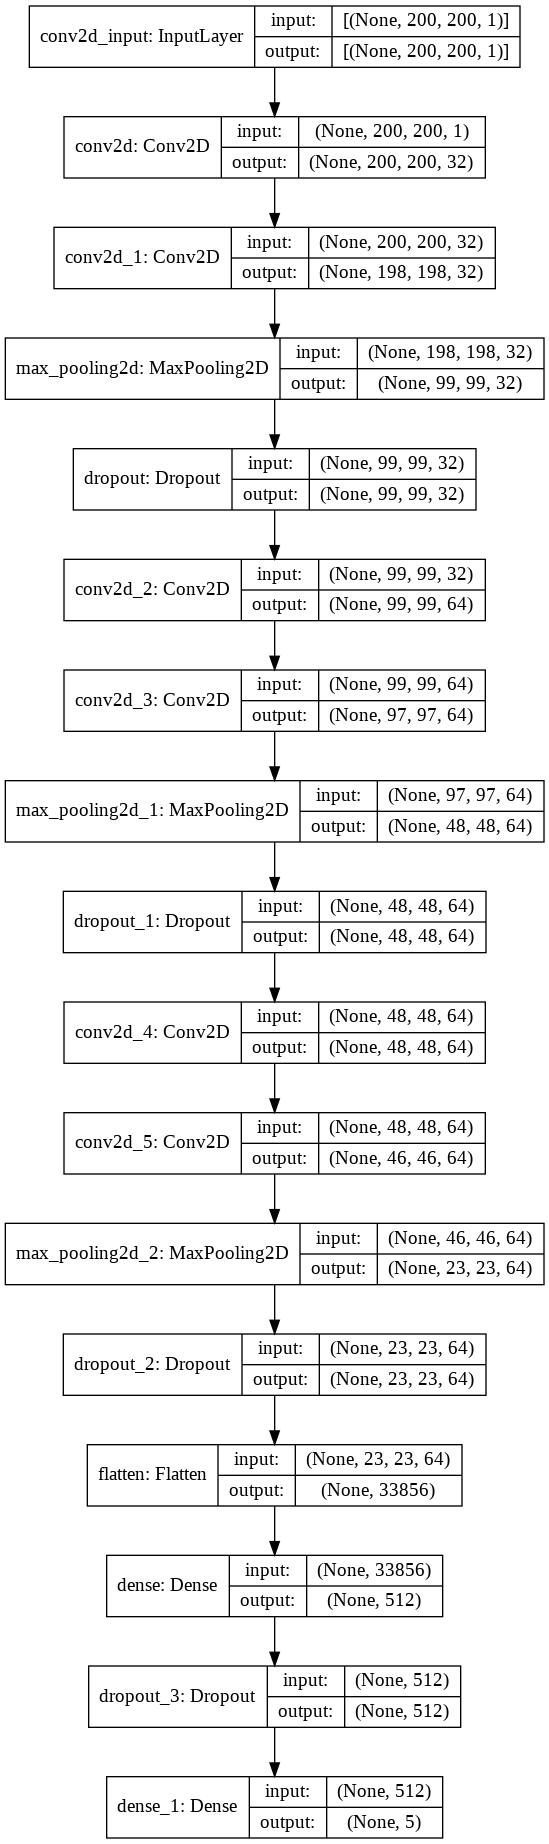

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create generators  - training data will be augmented images
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

batchsize=32
train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batchsize)

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=int(len(X_train)/batchsize), epochs=400, validation_data=validation_generator, validation_steps=int(len(X_test)/batchsize))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/400
114/114 [==============================] - 44s 113ms/step - loss: 1.4267 - accuracy: 0.3201 - val_loss: 1.2127 - val_accuracy: 0.3627
Epoch 2/400
114/114 [==============================] - 12s 108ms/step - loss: 1.2021 - accuracy: 0.3886 - val_loss: 1.2675 - val_accuracy: 0.3482
Epoch 3/400
114/114 [==============================] - 12s 108ms/step - loss: 1.1950 - accuracy: 0.3703 - val_loss: 1.1970 - val_accuracy: 0.3638
Epoch 4/400
114/114 [==============================] - 12s 109ms/step - loss: 1.2136 - accuracy: 0.3571 - val_loss: 1.1936 - val_accuracy: 0.3739
Epoch 5/400
114/114 [==============================] - 12s 109ms/step - loss: 1.1973 - accuracy: 0.3794 - val_loss: 1.2036 - val_accuracy: 0.3560
Epoch 6/400
114/114 [==============================] - 12s 107ms/step - loss: 1.1677 - accuracy: 0.3864 - val_loss: 1.1903 - val_accuracy: 0.4152
Epoch 7/400
114/114 [==============================] - 12s 109ms/step - loss: 1.1644 - accuracy: 0.4041 - val_loss: 1.2063 -

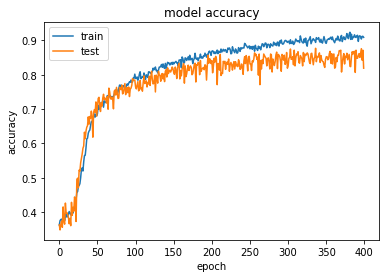

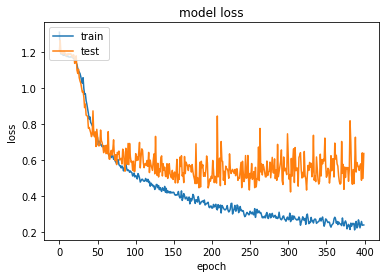

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_test, Y_test)
print(scores)

29/29 [==============================] - 1s 25ms/step - loss: 0.6289 - accuracy: 0.8215
[0.6288784146308899, 0.8215451836585999]


In [ ]:
from keras.models import load_model
from keras.models import model_from_json

In [ ]:
# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
bestmodel = model.to_json()

In [ ]:
with open("/content/gdrive/My Drive/FYP_2/best_model.json", "w") as json_file:
  json_file.write(bestmodel)

In [ ]:
# serialize weights to HDF5
model.save_weights("/content/gdrive/My Drive/FYP_2/best_weights.h5")

In [ ]:
model.save("/content/gdrive/My Drive/FYP_2/best_complete_model.h5")

In [ ]:
import tensorflow as tf
images = image.load_img("/content/gdrive/My Drive/Final year project/input/343_right.jpeg", target_size=(200, 200))    
x = image.img_to_array(images)
x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)
x = x/255.0
predictions = model.predict(x)
print(predictions)
classes = np.argmax(predictions, axis = 1)
print(classes)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,Adam
from sklearn import metrics
from tensorflow import keras
model = keras.models.load_model("/content/gdrive/My Drive/FYP_2/best_complete_model.h5")

In [ ]:
#metrics for the model
import tensorflow as tf
#prediction = model.predict_classes(X_test)
print(metrics.confusion_matrix(y_test, prediction))
print(metrics.classification_report(y_test, prediction, digits=3))


<class 'numpy.ndarray'>
(919, 200, 200, 1)
<class 'numpy.ndarray'>
(919,)
[[166   0   8   0   0]
 [  0 131   0   0   0]
 [ 17   0 162  10   1]
 [  9   0  66 139   7]
 [  3   0  23  20 157]]
              precision    recall  f1-score   support

           0      0.851     0.954     0.900       174
           1      1.000     1.000     1.000       131
           2      0.625     0.853     0.722       190
           3      0.822     0.629     0.713       221
           4      0.952     0.773     0.853       203

    accuracy                          0.822       919
   macro avg      0.850     0.842     0.837       919
weighted avg      0.841     0.822     0.822       919

